In [1]:
import warnings 
from tensorflow.keras.utils import pad_sequences 
from tensorflow.keras.preprocessing.text import Tokenizer 
from sklearn.model_selection import train_test_split 
import tensorflow as tf 
from tensorflow import keras 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import re 
import nltk 
nltk.download('all') 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
lemm = WordNetLemmatizer() 

warnings.filterwarnings("ignore") 


[nltk_data] Error loading all: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
data = pd.read_csv("F:\\Intern projects\\Ransomware final.csv")
data.head()

Name                               md5  Machine  \
0   memtest.exe  631ea355665f28d4707448e442fbf5b8      332   
1       ose.exe  9d10f99a6712e28f8acd5641e3a7ea6b      332   
2     setup.exe  4d92f518527353c0db88a70fddcfd390      332   
3      DW20.EXE  a41e524f8d45f0074fd07805ff0c9b12      332   
4  dwtrig20.exe  c87e561258f2f8650cef999bf643a731      332   

   SizeOfOptionalHeader  Characteristics  MajorLinkerVersion  \
0                   224              258                   9   
1                   224             3330                   9   
2                   224             3330                   9   
3                   224              258                   9   
4                   224              258                   9   

   MinorLinkerVersion  SizeOfCode  SizeOfInitializedData  \
0                   0      361984                 115712   
1                   0      130560                  19968   
2                   0      517120                 621568   
3                   0      585728                 369152   
4                   0      294912                 247296   

   SizeOfUninitializedData  ...  ResourcesNb  ResourcesMeanEntropy  \
0                        0  ...            4              3.262823   
1                        0  ...            2              4.250461   
2                        0  ...           11              4.426324   
3                        0  ...           10              4.364291   
4                        0  ...            2              4.306100   

   ResourcesMinEntropy  ResourcesMaxEntropy  ResourcesMeanSize  \
0             2.568844             3.537939         8797.00000   
1             3.420744             5.080177          837.00000   
2             2.846449             5.271813        31102.27273   
3             2.669314             6.400720         1457.00000   
4             3.421598             5.190603         1074.50000   

   ResourcesMinSize  ResourcesMaxSize  LoadConfigurationSize  \
0               216             18032                      0   
1               518              1156                     72   
2               104            270376                     72   
3                90              4264                     72   
4               849              1300                     72   

   VersionInformationSize  legitimate  
0                      16           1  
1                      18           1  
2                      18           1  
3                      18           1  
4                      18           1  

[5 rows x 57 columns]

In [3]:
df1 = pd.DataFrame(data,columns=["Characteristics","MajorLinkerVersion","MinorLinkerVersion","SizeOfCode","SizeOfInitializedData","SizeOfUninitializedData","ResourcesNb","ResourcesMeanEntropy","ResourcesMinEntropy","ResourcesMaxEntropy","ResourcesMeanSize","ResourcesMinSize","ResourcesMaxSize",
                   "LoadConfigurationSize","VersionInformationSize","legitimate"])

In [4]:
df1.head()

Characteristics  MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
0              258                   9                   0      361984   
1             3330                   9                   0      130560   
2             3330                   9                   0      517120   
3              258                   9                   0      585728   
4              258                   9                   0      294912   

   SizeOfInitializedData  SizeOfUninitializedData  ResourcesNb  \
0                 115712                        0            4   
1                  19968                        0            2   
2                 621568                        0           11   
3                 369152                        0           10   
4                 247296                        0            2   

   ResourcesMeanEntropy  ResourcesMinEntropy  ResourcesMaxEntropy  \
0              3.262823             2.568844             3.537939   
1              4.250461             3.420744             5.080177   
2              4.426324             2.846449             5.271813   
3              4.364291             2.669314             6.400720   
4              4.306100             3.421598             5.190603   

   ResourcesMeanSize  ResourcesMinSize  ResourcesMaxSize  \
0         8797.00000               216             18032   
1          837.00000               518              1156   
2        31102.27273               104            270376   
3         1457.00000                90              4264   
4         1074.50000               849              1300   

   LoadConfigurationSize  VersionInformationSize  legitimate  
0                      0                      16           1  
1                     72                      18           1  
2                     72                      18           1  
3                     72                      18           1  
4                     72                      18           1

In [5]:
df1.shape

(138047, 16)

In [6]:
df1.isnull().sum()

Characteristics            0
MajorLinkerVersion         0
MinorLinkerVersion         0
SizeOfCode                 0
SizeOfInitializedData      0
SizeOfUninitializedData    0
ResourcesNb                0
ResourcesMeanEntropy       0
ResourcesMinEntropy        0
ResourcesMaxEntropy        0
ResourcesMeanSize          0
ResourcesMinSize           0
ResourcesMaxSize           0
LoadConfigurationSize      0
VersionInformationSize     0
legitimate                 0
dtype: int64

In [7]:
df1.drop_duplicates(inplace=True)

In [8]:
df1.duplicated().sum()

0

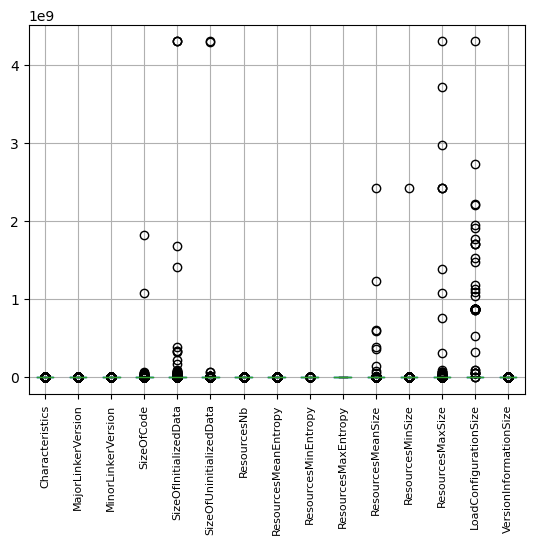

In [9]:
df1[["Characteristics","MajorLinkerVersion","MinorLinkerVersion","SizeOfCode","SizeOfInitializedData","SizeOfUninitializedData",
     "ResourcesNb","ResourcesMeanEntropy","ResourcesMinEntropy","ResourcesMaxEntropy","ResourcesMeanSize","ResourcesMinSize","ResourcesMaxSize",
     "LoadConfigurationSize","VersionInformationSize"]].boxplot()
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [10]:
data_num = df1[["Characteristics","MajorLinkerVersion","MinorLinkerVersion","SizeOfCode","SizeOfInitializedData","SizeOfUninitializedData",
     "ResourcesNb","ResourcesMeanEntropy","ResourcesMinEntropy","ResourcesMaxEntropy","ResourcesMeanSize","ResourcesMinSize","ResourcesMaxSize",
     "LoadConfigurationSize","VersionInformationSize"]] 

In [11]:
Q1=data_num.quantile(0.25)
Q3=data_num.quantile(0.75)
IQR = Q3- Q1

In [12]:
IQR

Characteristics              8179.000000
MajorLinkerVersion              1.000000
MinorLinkerVersion              0.000000
SizeOfCode                 235520.000000
SizeOfInitializedData      156160.000000
SizeOfUninitializedData         0.000000
ResourcesNb                    14.000000
ResourcesMeanEntropy            0.760176
ResourcesMinEntropy             1.570298
ResourcesMaxEntropy             2.438047
ResourcesMeanSize            1963.653846
ResourcesMinSize              858.000000
ResourcesMaxSize            18424.000000
LoadConfigurationSize          72.000000
VersionInformationSize          1.000000
dtype: float64

In [13]:
out_rows = ((data_num < (Q1-1.5*IQR))| (data_num > (Q3+1.5*IQR))).any(axis=1)

In [14]:
df1=df1[~out_rows]

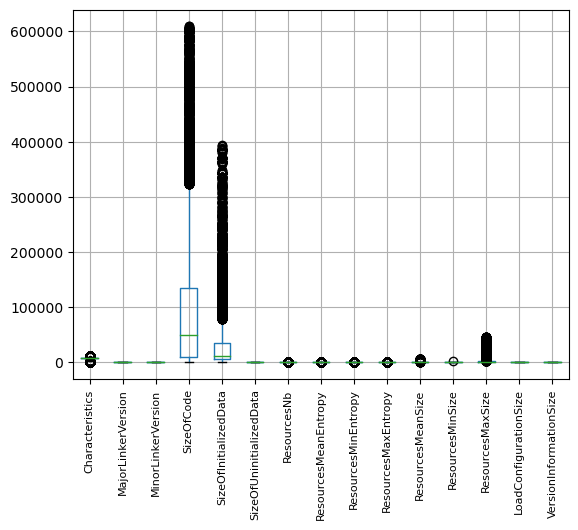

In [15]:
df1[["Characteristics","MajorLinkerVersion","MinorLinkerVersion","SizeOfCode","SizeOfInitializedData","SizeOfUninitializedData",
     "ResourcesNb","ResourcesMeanEntropy","ResourcesMinEntropy","ResourcesMaxEntropy","ResourcesMeanSize","ResourcesMinSize","ResourcesMaxSize",
     "LoadConfigurationSize","VersionInformationSize"]].boxplot()
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [16]:
df1[["Characteristics","MajorLinkerVersion","MinorLinkerVersion","SizeOfCode","SizeOfInitializedData","SizeOfUninitializedData",
     "ResourcesNb","ResourcesMeanEntropy","ResourcesMinEntropy","ResourcesMaxEntropy","ResourcesMeanSize","ResourcesMinSize","ResourcesMaxSize",
     "LoadConfigurationSize","VersionInformationSize"]].describe()


Characteristics  MajorLinkerVersion  MinorLinkerVersion     SizeOfCode  \
count     20517.000000        20517.000000             20517.0   20517.000000   
mean       6519.743335            8.739679                 0.0   98347.565044   
std        3476.901564            0.571835                 0.0  125239.613386   
min           2.000000            7.000000                 0.0       0.000000   
25%        8226.000000            8.000000                 0.0    9728.000000   
50%        8226.000000            9.000000                 0.0   49152.000000   
75%        8450.000000            9.000000                 0.0  135168.000000   
max       11522.000000           10.000000                 0.0  608768.000000   

       SizeOfInitializedData  SizeOfUninitializedData   ResourcesNb  \
count           20517.000000                  20517.0  20517.000000   
mean            29902.842521                      0.0      4.456548   
std             46903.313521                      0.0      6.373560   
min                 0.000000                      0.0      1.000000   
25%              5632.000000                      0.0      1.000000   
50%             11776.000000                      0.0      2.000000   
75%             34816.000000                      0.0      4.000000   
max            393216.000000                      0.0     36.000000   

       ResourcesMeanEntropy  ResourcesMinEntropy  ResourcesMaxEntropy  \
count          20517.000000         20517.000000         20517.000000   
mean               3.588332             3.023432             4.227642   
std                0.398025             0.687560             1.011532   
min                2.217779             0.000000             2.668827   
25%                3.403342             2.676833             3.540133   
50%                3.547126             3.454051             3.574480   
75%                3.717038             3.546802             4.952666   
max                5.186787             4.086077             7.992188   

       ResourcesMeanSize  ResourcesMinSize  ResourcesMaxSize  \
count       20517.000000      20517.000000      20517.000000   
mean         1139.918310        563.308330       3166.617732   
std           822.672743        411.356534       5853.671724   
min           158.833333          2.000000        556.000000   
25%           696.333333        200.000000        920.000000   
50%           932.000000        588.000000        972.000000   
75%          1116.000000        936.000000       1906.000000   
max          5650.000000       2084.000000      46989.000000   

       LoadConfigurationSize  VersionInformationSize  
count           20517.000000            20517.000000  
mean               23.566798               16.359312  
std                33.788896                0.720259  
min                 0.000000               15.000000  
25%                 0.000000               16.000000  
50%                 0.000000               16.000000  
75%                72.000000               17.000000  
max               112.000000               18.000000

In [17]:
# Exploratory Data Analysis
# count plot we automatically plot 
# the unique count of the feature selected 

#sns.countplot(data=df1, x='legitimate') 
#plt.xticks(rotation=90) 
#plt.show() 


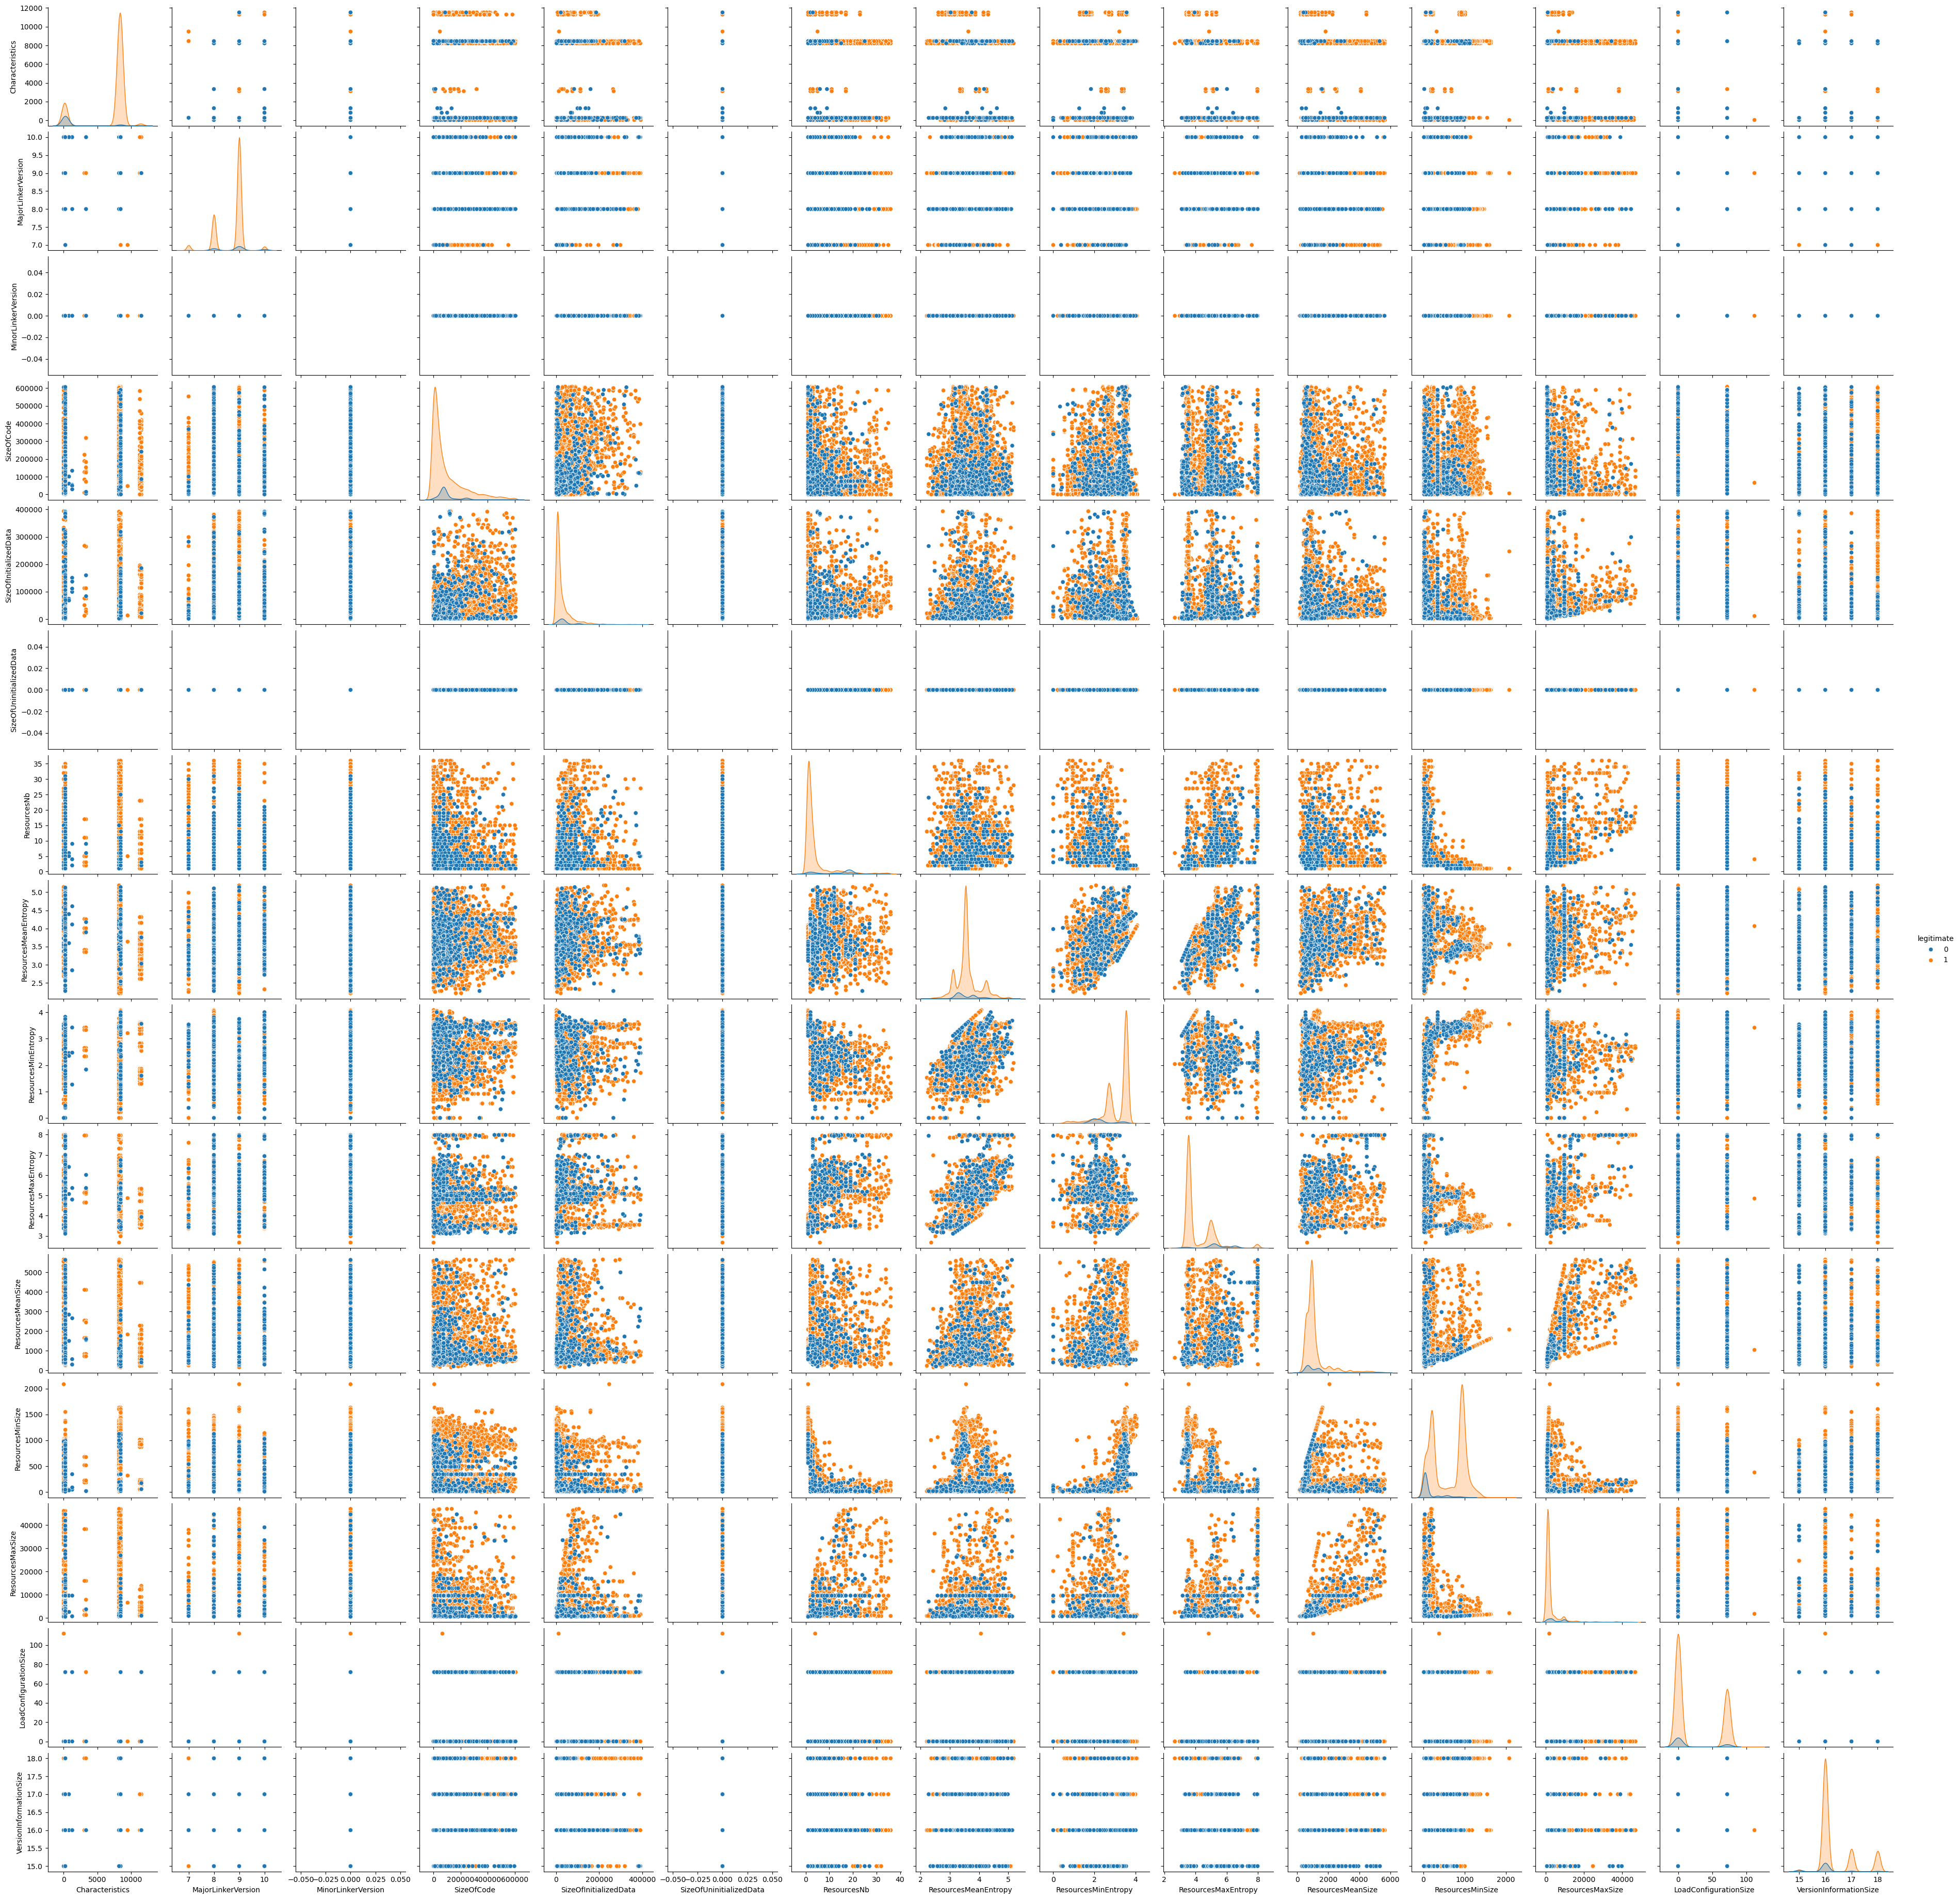

In [18]:
sns.pairplot(df1,hue="legitimate")
plt.show()

In [19]:
df1.head()

Characteristics  MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
1             3330                   9                   0      130560   
3              258                   9                   0      585728   
4              258                   9                   0      294912   
5              258                   9                   0         512   
6              290                   9                   0      222720   

   SizeOfInitializedData  SizeOfUninitializedData  ResourcesNb  \
1                  19968                        0            2   
3                 369152                        0           10   
4                 247296                        0            2   
5                  46592                        0           10   
6                  67072                        0            7   

   ResourcesMeanEntropy  ResourcesMinEntropy  ResourcesMaxEntropy  \
1              4.250461             3.420744             5.080177   
3              4.364291             2.669314             6.400720   
4              4.306100             3.421598             5.190603   
5              4.843545             2.718577             7.965023   
6              3.892779             1.346314             5.232167   

   ResourcesMeanSize  ResourcesMinSize  ResourcesMaxSize  \
1         837.000000               518              1156   
3        1457.000000                90              4264   
4        1074.500000               849              1300   
5        3858.600000               104             14671   
6        1629.142857                52              8648   

   LoadConfigurationSize  VersionInformationSize  legitimate  
1                     72                      18           1  
3                     72                      18           1  
4                     72                      18           1  
5                      0                      16           1  
6                     72                      16           1

In [51]:
x = df1.iloc[:,:15].values
y = df1.iloc[:,15].values

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [55]:
num_inputs = 15
num_hidden_units = 64
num_outputs = 1
model = Sequential()

In [56]:
model.add(SimpleRNN(num_hidden_units, input_shape=(num_inputs, 1)))
model.add(Dense(num_outputs)) 

In [57]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)  # 20% validation split

Epoch 1/5
411/411 [==============================] - 3s 5ms/step - loss: 1.3147 - accuracy: 0.9138 - val_loss: 1.4121 - val_accuracy: 0.9074
Epoch 2/5
411/411 [==============================] - 2s 4ms/step - loss: 1.3147 - accuracy: 0.9138 - val_loss: 1.4121 - val_accuracy: 0.9074
Epoch 3/5
411/411 [==============================] - 2s 4ms/step - loss: 1.3147 - accuracy: 0.9138 - val_loss: 1.4121 - val_accuracy: 0.9074
Epoch 4/5
411/411 [==============================] - 2s 4ms/step - loss: 1.3147 - accuracy: 0.9138 - val_loss: 1.4121 - val_accuracy: 0.9074
Epoch 5/5
411/411 [==============================] - 2s 4ms/step - loss: 1.3147 - accuracy: 0.9138 - val_loss: 1.4121 - val_accuracy: 0.9074


In [58]:
result = model.evaluate(x_test, y_test)

129/129 [==============================] - 0s 2ms/step - loss: 1.2485 - accuracy: 0.9181


In [59]:
print("Test Accuracy:", result[1])

Test Accuracy: 0.9181286692619324
